In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [5]:
torch.manual_seed(42)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [6]:
# dataset prep
batch_size = 128

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
        ])
train_data = datasets.MNIST('mnist_data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('mnist_data', train=False, download=True, transform=transform)

# Generate random labels
random_labels = torch.randint(0, 10, (len(train_data),), dtype=torch.long)

# Assign random labels to the training dataset
train_data.targets = random_labels

training_DataLoader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
testing_DataLoader= DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [7]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.dense1 = nn.Linear(64*7*7, 128)
    self.dense2 = nn.Linear(128, 10)


  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool2(x)
    x = x.view(x.shape[0], -1)
    x = self.dense1(x)
    x = self.dense2(x)
    return F.log_softmax(x, dim=1)

In [8]:

def train(model, optimizer, train_loader):
    model.train()
    loss_func = torch.nn.CrossEntropyLoss()
    correct = 0
    total_samples = 0
    batch_loss=[]

    for i, batch in tqdm(enumerate(train_loader)):
        images, labels = batch[0].to(device), batch[1].to(device)
        # Forward pass
        output = model(images)
        loss = loss_func(output, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update metrics
        predicted = torch.max(output.data, 1)[1]
        correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        batch_loss.append(loss.item())

    # Calculate average loss
    train_loss = sum(batch_loss) / len(train_loader.dataset)

    acc = 100. * correct / total_samples
    return train_loss, acc

In [9]:
def test(model, test_loader):
    model.eval()
    test_losses = []
    loss_func = torch.nn.CrossEntropyLoss()
    correct = 0
    total_samples = 0

    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            images, labels = batch[0].to(device), batch[1].to(device)

            output = model(images)
            loss = loss_func(output, labels)
            test_losses.append(loss.item())

            _, pred = torch.max(output, 1)
            correct += (pred == labels).sum().item()
            total_samples += labels.size(0)


    # Calculate average loss
    test_loss = sum(test_losses) / len(test_loader.dataset)

    # Calculate accuracy
    accuracy = 100. * correct / total_samples


    return test_loss, accuracy

In [10]:
epochs = 100
model = Model().to(device)
optimizer1 = optim.Adam(model.parameters(), lr=1e-4)

train_loss_arr = []
test_loss_arr = []

for epoch in range(epochs):
    train_loss, train_acc = train(model, optimizer1, training_DataLoader)
    test_loss, test_acc = test(model, testing_DataLoader)

    print(f'Epoch - {epoch} Train Loss - {train_loss:.6f} Test Loss - {test_loss:.6f} Train Accuracy - {train_acc:.6f} Test Accuracy - {test_acc:.6f}')

    train_loss_arr.append(train_loss)
    test_loss_arr.append(test_loss)


469it [00:26, 18.00it/s]


Epoch - 0 Train Loss - 0.018019 Test Loss - 0.018194 Train Accuracy - 9.995000 Test Accuracy - 11.450000


469it [00:14, 31.87it/s]


Epoch - 1 Train Loss - 0.017991 Test Loss - 0.018189 Train Accuracy - 10.583333 Test Accuracy - 10.200000


469it [00:16, 28.85it/s]


Epoch - 2 Train Loss - 0.017977 Test Loss - 0.018199 Train Accuracy - 11.341667 Test Accuracy - 5.910000


469it [00:13, 34.42it/s]


Epoch - 3 Train Loss - 0.017955 Test Loss - 0.018198 Train Accuracy - 11.771667 Test Accuracy - 12.540000


469it [00:13, 33.94it/s]


Epoch - 4 Train Loss - 0.017925 Test Loss - 0.018340 Train Accuracy - 12.753333 Test Accuracy - 6.710000


469it [00:13, 34.14it/s]


Epoch - 5 Train Loss - 0.017890 Test Loss - 0.018289 Train Accuracy - 13.213333 Test Accuracy - 8.800000


469it [00:13, 34.48it/s]


Epoch - 6 Train Loss - 0.017847 Test Loss - 0.018304 Train Accuracy - 13.838333 Test Accuracy - 12.140000


469it [00:13, 33.89it/s]


Epoch - 7 Train Loss - 0.017797 Test Loss - 0.018356 Train Accuracy - 14.563333 Test Accuracy - 11.730000


469it [00:13, 33.92it/s]


Epoch - 8 Train Loss - 0.017745 Test Loss - 0.018470 Train Accuracy - 14.950000 Test Accuracy - 7.440000


469it [00:13, 34.61it/s]


Epoch - 9 Train Loss - 0.017685 Test Loss - 0.018398 Train Accuracy - 15.623333 Test Accuracy - 10.390000


469it [00:13, 34.45it/s]


Epoch - 10 Train Loss - 0.017622 Test Loss - 0.018728 Train Accuracy - 16.196667 Test Accuracy - 7.150000


469it [00:13, 33.95it/s]


Epoch - 11 Train Loss - 0.017561 Test Loss - 0.018498 Train Accuracy - 16.770000 Test Accuracy - 9.090000


469it [00:13, 34.46it/s]


Epoch - 12 Train Loss - 0.017500 Test Loss - 0.018521 Train Accuracy - 17.113333 Test Accuracy - 9.010000


469it [00:13, 33.85it/s]


Epoch - 13 Train Loss - 0.017428 Test Loss - 0.018607 Train Accuracy - 17.870000 Test Accuracy - 8.800000


469it [00:15, 31.15it/s]


Epoch - 14 Train Loss - 0.017369 Test Loss - 0.018606 Train Accuracy - 18.260000 Test Accuracy - 8.460000


469it [00:14, 32.74it/s]


Epoch - 15 Train Loss - 0.017304 Test Loss - 0.018587 Train Accuracy - 18.645000 Test Accuracy - 10.400000


469it [00:13, 34.25it/s]


Epoch - 16 Train Loss - 0.017251 Test Loss - 0.018745 Train Accuracy - 18.961667 Test Accuracy - 8.820000


469it [00:13, 33.96it/s]


Epoch - 17 Train Loss - 0.017186 Test Loss - 0.018844 Train Accuracy - 19.726667 Test Accuracy - 8.740000


469it [00:14, 31.86it/s]


Epoch - 18 Train Loss - 0.017129 Test Loss - 0.018975 Train Accuracy - 20.030000 Test Accuracy - 8.950000


469it [00:15, 31.17it/s]


Epoch - 19 Train Loss - 0.017073 Test Loss - 0.018985 Train Accuracy - 20.281667 Test Accuracy - 9.690000


469it [00:13, 34.57it/s]


Epoch - 20 Train Loss - 0.017020 Test Loss - 0.018764 Train Accuracy - 20.731667 Test Accuracy - 10.480000


469it [00:13, 34.62it/s]


Epoch - 21 Train Loss - 0.016962 Test Loss - 0.018857 Train Accuracy - 20.843333 Test Accuracy - 10.420000


469it [00:13, 34.30it/s]


Epoch - 22 Train Loss - 0.016913 Test Loss - 0.019290 Train Accuracy - 21.433333 Test Accuracy - 8.410000


469it [00:13, 33.92it/s]


Epoch - 23 Train Loss - 0.016870 Test Loss - 0.018943 Train Accuracy - 21.391667 Test Accuracy - 10.300000


469it [00:13, 34.11it/s]


Epoch - 24 Train Loss - 0.016828 Test Loss - 0.019036 Train Accuracy - 21.671667 Test Accuracy - 9.410000


469it [00:13, 34.05it/s]


Epoch - 25 Train Loss - 0.016780 Test Loss - 0.019046 Train Accuracy - 22.188333 Test Accuracy - 10.200000


469it [00:13, 34.05it/s]


Epoch - 26 Train Loss - 0.016742 Test Loss - 0.019220 Train Accuracy - 22.300000 Test Accuracy - 9.670000


469it [00:13, 34.14it/s]


Epoch - 27 Train Loss - 0.016703 Test Loss - 0.019172 Train Accuracy - 22.520000 Test Accuracy - 9.920000


469it [00:13, 34.07it/s]


Epoch - 28 Train Loss - 0.016664 Test Loss - 0.019303 Train Accuracy - 22.671667 Test Accuracy - 10.280000


469it [00:13, 34.68it/s]


Epoch - 29 Train Loss - 0.016621 Test Loss - 0.019545 Train Accuracy - 23.108333 Test Accuracy - 8.900000


469it [00:13, 34.72it/s]


Epoch - 30 Train Loss - 0.016591 Test Loss - 0.019112 Train Accuracy - 23.130000 Test Accuracy - 11.390000


469it [00:14, 31.47it/s]


Epoch - 31 Train Loss - 0.016551 Test Loss - 0.019318 Train Accuracy - 23.291667 Test Accuracy - 10.590000


469it [00:16, 29.06it/s]


Epoch - 32 Train Loss - 0.016515 Test Loss - 0.019643 Train Accuracy - 23.625000 Test Accuracy - 8.870000


469it [00:16, 28.70it/s]


Epoch - 33 Train Loss - 0.016486 Test Loss - 0.019524 Train Accuracy - 23.910000 Test Accuracy - 9.660000


469it [00:16, 28.84it/s]


Epoch - 34 Train Loss - 0.016452 Test Loss - 0.019712 Train Accuracy - 24.055000 Test Accuracy - 9.300000


469it [00:16, 28.72it/s]


Epoch - 35 Train Loss - 0.016412 Test Loss - 0.019633 Train Accuracy - 24.470000 Test Accuracy - 10.620000


469it [00:13, 34.39it/s]


Epoch - 36 Train Loss - 0.016393 Test Loss - 0.019846 Train Accuracy - 24.380000 Test Accuracy - 9.300000


469it [00:13, 34.12it/s]


Epoch - 37 Train Loss - 0.016358 Test Loss - 0.019665 Train Accuracy - 24.523333 Test Accuracy - 9.940000


469it [00:13, 34.06it/s]


Epoch - 38 Train Loss - 0.016334 Test Loss - 0.019761 Train Accuracy - 24.835000 Test Accuracy - 10.450000


469it [00:13, 34.15it/s]


Epoch - 39 Train Loss - 0.016311 Test Loss - 0.019693 Train Accuracy - 24.800000 Test Accuracy - 10.380000


469it [00:13, 34.11it/s]


Epoch - 40 Train Loss - 0.016274 Test Loss - 0.019780 Train Accuracy - 25.173333 Test Accuracy - 10.600000


469it [00:13, 34.53it/s]


Epoch - 41 Train Loss - 0.016255 Test Loss - 0.019902 Train Accuracy - 24.973333 Test Accuracy - 9.690000


469it [00:13, 34.24it/s]


Epoch - 42 Train Loss - 0.016219 Test Loss - 0.019659 Train Accuracy - 25.241667 Test Accuracy - 10.960000


469it [00:13, 34.10it/s]


Epoch - 43 Train Loss - 0.016200 Test Loss - 0.020104 Train Accuracy - 25.593333 Test Accuracy - 9.660000


469it [00:13, 34.20it/s]


Epoch - 44 Train Loss - 0.016171 Test Loss - 0.019684 Train Accuracy - 25.680000 Test Accuracy - 11.530000


469it [00:13, 34.12it/s]


Epoch - 45 Train Loss - 0.016149 Test Loss - 0.019834 Train Accuracy - 25.693333 Test Accuracy - 10.500000


469it [00:13, 34.08it/s]


Epoch - 46 Train Loss - 0.016142 Test Loss - 0.020177 Train Accuracy - 25.778333 Test Accuracy - 9.150000


469it [00:15, 29.48it/s]


Epoch - 47 Train Loss - 0.016108 Test Loss - 0.020028 Train Accuracy - 26.043333 Test Accuracy - 10.020000


469it [00:14, 33.20it/s]


Epoch - 48 Train Loss - 0.016081 Test Loss - 0.020118 Train Accuracy - 26.086667 Test Accuracy - 9.580000


469it [00:13, 34.07it/s]


Epoch - 49 Train Loss - 0.016061 Test Loss - 0.019998 Train Accuracy - 26.218333 Test Accuracy - 10.580000


469it [00:13, 34.53it/s]


Epoch - 50 Train Loss - 0.016047 Test Loss - 0.020141 Train Accuracy - 26.368333 Test Accuracy - 9.820000


469it [00:14, 31.49it/s]


Epoch - 51 Train Loss - 0.016015 Test Loss - 0.019982 Train Accuracy - 26.580000 Test Accuracy - 10.650000


469it [00:14, 32.36it/s]


Epoch - 52 Train Loss - 0.015994 Test Loss - 0.020132 Train Accuracy - 26.666667 Test Accuracy - 10.670000


469it [00:13, 34.51it/s]


Epoch - 53 Train Loss - 0.015968 Test Loss - 0.020511 Train Accuracy - 26.805000 Test Accuracy - 9.340000


469it [00:13, 33.77it/s]


Epoch - 54 Train Loss - 0.015964 Test Loss - 0.019798 Train Accuracy - 26.850000 Test Accuracy - 11.850000


469it [00:13, 33.78it/s]


Epoch - 55 Train Loss - 0.015936 Test Loss - 0.020159 Train Accuracy - 27.163333 Test Accuracy - 10.450000


469it [00:13, 34.22it/s]


Epoch - 56 Train Loss - 0.015911 Test Loss - 0.020144 Train Accuracy - 27.230000 Test Accuracy - 10.020000


469it [00:13, 34.76it/s]


Epoch - 57 Train Loss - 0.015896 Test Loss - 0.020494 Train Accuracy - 27.141667 Test Accuracy - 9.610000


469it [00:13, 34.76it/s]


Epoch - 58 Train Loss - 0.015876 Test Loss - 0.020316 Train Accuracy - 27.446667 Test Accuracy - 10.190000


469it [00:13, 34.15it/s]


Epoch - 59 Train Loss - 0.015858 Test Loss - 0.020291 Train Accuracy - 27.396667 Test Accuracy - 10.530000


469it [00:13, 34.13it/s]


Epoch - 60 Train Loss - 0.015844 Test Loss - 0.020112 Train Accuracy - 27.555000 Test Accuracy - 10.740000


469it [00:13, 34.71it/s]


Epoch - 61 Train Loss - 0.015826 Test Loss - 0.020250 Train Accuracy - 27.436667 Test Accuracy - 10.280000


469it [00:13, 34.71it/s]


Epoch - 62 Train Loss - 0.015807 Test Loss - 0.020367 Train Accuracy - 27.775000 Test Accuracy - 10.190000


469it [00:13, 34.59it/s]


Epoch - 63 Train Loss - 0.015788 Test Loss - 0.020407 Train Accuracy - 27.938333 Test Accuracy - 10.500000


469it [00:13, 34.14it/s]


Epoch - 64 Train Loss - 0.015761 Test Loss - 0.020648 Train Accuracy - 27.990000 Test Accuracy - 9.860000


469it [00:13, 34.35it/s]


Epoch - 65 Train Loss - 0.015750 Test Loss - 0.020132 Train Accuracy - 27.986667 Test Accuracy - 11.400000


469it [00:13, 34.85it/s]


Epoch - 66 Train Loss - 0.015732 Test Loss - 0.020345 Train Accuracy - 28.221667 Test Accuracy - 10.810000


469it [00:15, 31.05it/s]


Epoch - 67 Train Loss - 0.015713 Test Loss - 0.020280 Train Accuracy - 28.206667 Test Accuracy - 10.660000


469it [00:14, 33.24it/s]


Epoch - 68 Train Loss - 0.015698 Test Loss - 0.020584 Train Accuracy - 28.423333 Test Accuracy - 9.800000


469it [00:13, 34.53it/s]


Epoch - 69 Train Loss - 0.015678 Test Loss - 0.020672 Train Accuracy - 28.620000 Test Accuracy - 9.630000


469it [00:13, 35.12it/s]


Epoch - 70 Train Loss - 0.015671 Test Loss - 0.020695 Train Accuracy - 28.416667 Test Accuracy - 9.510000


469it [00:13, 34.73it/s]


Epoch - 71 Train Loss - 0.015657 Test Loss - 0.020648 Train Accuracy - 28.571667 Test Accuracy - 10.200000


469it [00:13, 35.06it/s]


Epoch - 72 Train Loss - 0.015640 Test Loss - 0.020968 Train Accuracy - 28.766667 Test Accuracy - 9.230000


469it [00:13, 34.91it/s]


Epoch - 73 Train Loss - 0.015615 Test Loss - 0.020596 Train Accuracy - 28.675000 Test Accuracy - 10.280000


469it [00:13, 34.37it/s]


Epoch - 74 Train Loss - 0.015600 Test Loss - 0.020969 Train Accuracy - 28.981667 Test Accuracy - 9.860000


469it [00:15, 30.32it/s]


Epoch - 75 Train Loss - 0.015583 Test Loss - 0.020773 Train Accuracy - 28.968333 Test Accuracy - 9.710000


469it [00:13, 34.81it/s]


Epoch - 76 Train Loss - 0.015565 Test Loss - 0.020804 Train Accuracy - 29.046667 Test Accuracy - 10.200000


469it [00:13, 35.03it/s]


Epoch - 77 Train Loss - 0.015557 Test Loss - 0.020622 Train Accuracy - 29.133333 Test Accuracy - 10.960000


469it [00:13, 34.98it/s]


Epoch - 78 Train Loss - 0.015548 Test Loss - 0.020327 Train Accuracy - 29.161667 Test Accuracy - 11.380000


469it [00:13, 34.38it/s]


Epoch - 79 Train Loss - 0.015526 Test Loss - 0.021113 Train Accuracy - 29.371667 Test Accuracy - 9.210000


469it [00:13, 34.73it/s]


Epoch - 80 Train Loss - 0.015510 Test Loss - 0.020750 Train Accuracy - 29.266667 Test Accuracy - 10.750000


469it [00:13, 34.45it/s]


Epoch - 81 Train Loss - 0.015502 Test Loss - 0.020734 Train Accuracy - 29.258333 Test Accuracy - 10.410000


469it [00:13, 34.39it/s]


Epoch - 82 Train Loss - 0.015487 Test Loss - 0.020409 Train Accuracy - 29.586667 Test Accuracy - 11.500000


469it [00:13, 34.57it/s]


Epoch - 83 Train Loss - 0.015470 Test Loss - 0.020974 Train Accuracy - 29.688333 Test Accuracy - 9.680000


469it [00:13, 34.47it/s]


Epoch - 84 Train Loss - 0.015456 Test Loss - 0.020265 Train Accuracy - 29.665000 Test Accuracy - 11.780000


469it [00:13, 34.91it/s]


Epoch - 85 Train Loss - 0.015447 Test Loss - 0.021030 Train Accuracy - 29.616667 Test Accuracy - 10.140000


469it [00:13, 35.22it/s]


Epoch - 86 Train Loss - 0.015431 Test Loss - 0.021331 Train Accuracy - 29.721667 Test Accuracy - 8.790000


469it [00:15, 30.50it/s]


Epoch - 87 Train Loss - 0.015419 Test Loss - 0.020840 Train Accuracy - 29.813333 Test Accuracy - 10.490000


469it [00:16, 29.26it/s]


Epoch - 88 Train Loss - 0.015404 Test Loss - 0.021157 Train Accuracy - 29.900000 Test Accuracy - 9.580000


469it [00:15, 30.00it/s]


Epoch - 89 Train Loss - 0.015394 Test Loss - 0.021339 Train Accuracy - 29.868333 Test Accuracy - 8.960000


469it [00:13, 34.96it/s]


Epoch - 90 Train Loss - 0.015379 Test Loss - 0.021060 Train Accuracy - 30.101667 Test Accuracy - 10.010000


469it [00:13, 34.82it/s]


Epoch - 91 Train Loss - 0.015361 Test Loss - 0.020880 Train Accuracy - 30.075000 Test Accuracy - 10.650000


469it [00:13, 33.98it/s]


Epoch - 92 Train Loss - 0.015353 Test Loss - 0.021156 Train Accuracy - 30.258333 Test Accuracy - 9.750000


469it [00:13, 34.75it/s]


Epoch - 93 Train Loss - 0.015342 Test Loss - 0.020956 Train Accuracy - 30.405000 Test Accuracy - 10.110000


469it [00:13, 34.86it/s]


Epoch - 94 Train Loss - 0.015326 Test Loss - 0.020858 Train Accuracy - 30.200000 Test Accuracy - 10.690000


469it [00:13, 34.47it/s]


Epoch - 95 Train Loss - 0.015317 Test Loss - 0.021306 Train Accuracy - 30.576667 Test Accuracy - 9.170000


469it [00:13, 34.59it/s]


Epoch - 96 Train Loss - 0.015301 Test Loss - 0.020916 Train Accuracy - 30.413333 Test Accuracy - 10.680000


469it [00:13, 34.89it/s]


Epoch - 97 Train Loss - 0.015284 Test Loss - 0.021239 Train Accuracy - 30.505000 Test Accuracy - 9.610000


469it [00:13, 34.59it/s]


Epoch - 98 Train Loss - 0.015277 Test Loss - 0.021080 Train Accuracy - 30.546667 Test Accuracy - 10.100000


469it [00:13, 34.65it/s]


Epoch - 99 Train Loss - 0.015257 Test Loss - 0.021084 Train Accuracy - 30.671667 Test Accuracy - 9.840000


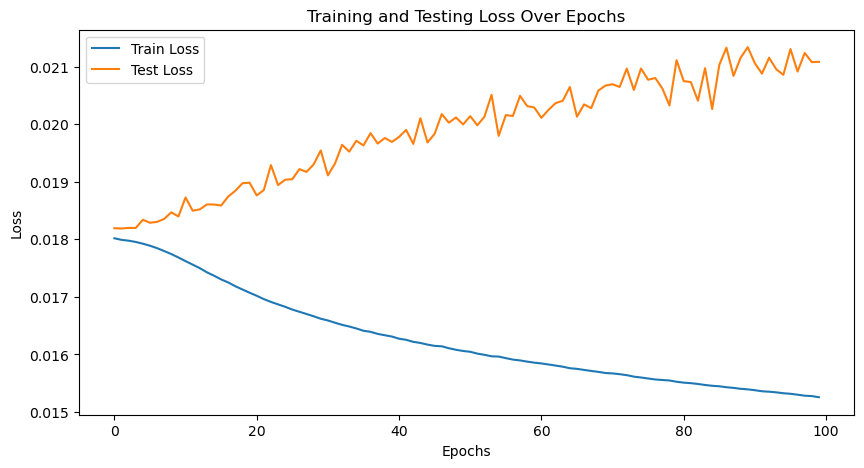

In [11]:
# Visualize Loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_arr, label='Train Loss')
plt.plot(test_loss_arr, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
train_loss_arr

[0.01801906446615855,
 0.017999398493766784,
 0.017990918040275573,
 0.017983108615875244,
 0.01797765740553538,
 0.01796959365606308,
 0.017963631089528403,
 0.01795589842001597,
 0.017949538759390513,
 0.017942552200953164]

In [ ]:
test_loss_arr

[0.01817552626132965,
 0.01818337230682373,
 0.018212887620925905,
 0.018220176076889038,
 0.018190062308311463,
 0.018204889607429504,
 0.018178352522850036,
 0.01820624873638153,
 0.01823055875301361,
 0.018217967104911803]